# Researching Global Happiness
> _A Data Science project for an experimental design capstone._

### David Booker-Earley
### 2/12/2020

---

# Introduction

#### The _World Happiness Report (2019)_ provides opportunities for each nation to assess its progress based on the well-being of its citizens using various factors.
>For example, economists, policy makers, psychologists, statisticians and others can work more effectively with their respective countries to evaluate and improve economic development, healthcare systems, public policies, and social morale by regularly using happiness indicators with various factors.

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### The goal of this project is to determine how five of the six given factors contribute to a country’s happiness.

>_Three hypotheses will be tested through data exploration based on the following investigative questions:_
1. Does a country's economic production make people happier than having a healthy life expectancy?
2. Is a country's perceived corruption related to the overall happiness of its citizens?
3. Does having social support make people happier than having the freedom to make life choices?

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### The research results for these hypotheses will provide insight to which factors, on average, contribute more to a country’s happiness; as such, the findings might be interesting to the following: 
>_Economists, engineers, government agencies, policy makers, psychologists, statisticians and anyone who is inherently inquisitive._

---

# Hypotheses

## Overview
#### Null Hypothesis:

There is no significant difference between $\mu_1$ and $\mu_2$, and thus, $\mu_1$ is identical to $\mu_2$.

$$H_O : \mu_1 - \mu_2 = 0$$

#### Alternative Hypothesis: 

There is a significant difference between $\mu_1$ and $\mu_2$.

$$H_a : \mu_1 - \mu_2 \neq 0$$


<!-- 
Alternatively, display both equations individually with "\begin{equation*}", or together inside of "\begin{align}" and separated by "\\" like this:

$$
\begin{align}
H_O : \mu_1 - \mu_2 = 0 \\
H_a : \mu_1 - \mu_2 \neq 0
\end{align}
$$
-->


>Where $\mu_1$ is the population mean of the first group, and $\mu_2$ is the population mean of the second group.

---

## Hypotheses to Test

#### Given the collected samples, the generic **null** and **alternative** hypotheses are specifically applied in the following manners:

**Null Hypotheses**

>$H_{O_1}$: On average, there is no significant difference between how the factors `GDP per capita` and `healthy life expectancy` contribute to a country's `overall happiness score`.

>$H_{O_2}$: There is no significant relationship between a country's `perceived corruption` and its `overall happiness score`.

>$H_{O_3}$: On average, there is no significant difference between how the factors `social support` and `freedom to make life choices` contribute to a country's `overall happiness score`.


**Alternative Hypotheses**

>$H_{a_1}$: A country's `economic production` makes people happier than having a `healthy life expectancy`.

>$H_{a_1}$: A country's `perceived corruption` is related to the `overall happiness` of its citizens.

>$H_{a_3}$: Having `social support` makes people happier than having the `freedom to make life choices`.

# Data Overview



The `2019 Happiness Data` comes from Kaggle, located [here](https://www.kaggle.com/unsdsn/world-happiness#2019.csv), and shows which countries ranked the highest in overall happiness. It includes 156 countries (rows) and 9 variables (columns), 6 of which are the factors of happiness. 
* The values for each factor are dimensionless quantities describing the extent to which that factor contributes in the evaluation of a country’s happiness; that is, these values outline the factor’s importance relative to each country, which provides insight to why each country may have a higher or lower rank than others.

**Important Observations**
>There are no missing values for the given factors of happiness; however, overall, the summation of all 6 factors don't equal the value given in the `Score` field.
- Thus, the calculations performed in the `Methods` section will use the provided raw data in lieu of missing variables or ambiguous multipliers, through which, one could replicate the given total `Score` value.

---

In [0]:
import math  # Provides mathematical functions & tools
import pandas as pd  # Provides data accessibility & data processing tools
import matplotlib.pyplot as plt  # Provides plotting tools
import seaborn as sns  # Provides plotting tools
from scipy import stats  # Provides mathematical & statistical tools

# Ensure the plot-figures are displayed inline
%matplotlib inline

In [2]:
## Load and view data
link = 'https://raw.githubusercontent.com/devid-davops/DS-Project-1/master/world_happiness_data_2019.csv'
df = pd.read_csv(link)

df.info()
print()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
Overall rank                    156 non-null int64
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
## View the last several row-entries
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [4]:
## Are there any missing values?
# Missing values can also be confirmed by viewing the "df.info()" results.
print('Are there any missing (NULL or NAN) values?\n')
print(df.isna().any())

Are there any missing (NULL or NAN) values?

Overall rank                    False
Country or region               False
Score                           False
GDP per capita                  False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
Generosity                      False
Perceptions of corruption       False
dtype: bool


# Methods

### Steps used to investigate research questions:

1. Load and clean the data.
2. Calculate the statistics.
3. Visualize the data and their statistics.
4. Observe and discuss the results.

## Preliminary Work

In [5]:
## Calculate the actual happiness scores from the raw data

# Get a list of all factor names
col_list = list(df.keys())  # Alternative:  df.columns.values.tolist()
factor_list = col_list[-6:]
print(f"Factor Names: {factor_list}")

# Use a copy of original data to avoid accidental (recursive) manipulation
df_2 = df.copy()
df_2['Actual Happiness Score'] = df[factor_list].sum(axis=1)
#Alternative: df_2 = df.assign(HappinessScore=df[factor_list].sum(axis=1))

Factor Names: ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


In [6]:
## Preview the changes
print('\n\nUpdated DataFrame showing actual happiness scores:')
df_2.head()



Updated DataFrame showing actual happiness scores:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual Happiness Score
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5.055
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5.206
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5.313
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5.093
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,5.094


In [7]:
df_2.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual Happiness Score
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2.867
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2.700
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.411
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0.626
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,1.479


## The Fun Side of Research

### 1. Does a country's economic production make people happier than having a healthy life expectancy?

In [8]:
## Assign convenient names to variables
var_1 = df_2['GDP per capita']
var_2 = df_2['Healthy life expectancy']


## Calculate descriptive statistics for each variable
print(var_1.describe())
print('\n\n')
var_2.describe()

count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64





count    156.000000
mean       0.725244
std        0.242124
min        0.000000
25%        0.547750
50%        0.789000
75%        0.881750
max        1.141000
Name: Healthy life expectancy, dtype: float64

In [0]:
## Set default parameters & theme for displays
sns.set()

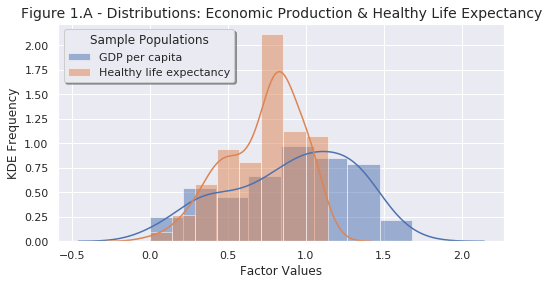

In [10]:
## Visualize sample population distributions
plt.figure(figsize=(8,4))
bins = 8
ax1 = sns.distplot(var_1,
                   bins=bins,
                   kde=True,  #Plots a kernel density estimate curve
                   rug=False,  #Plots a tiny vertical tick per observation
                   label='GDP per capita',
                   hist_kws={'alpha': 0.5})  #Changes transparency of plot
sns.distplot(var_2,
             kde=True,
             rug=False,
             bins=bins,
             label='Healthy life expectancy',
             hist_kws={'alpha': 0.5},
             ax=ax1)
plt.legend(loc='upper left', title='Sample Populations', shadow=True)
plt.xlabel('Factor Values')
plt.ylabel('KDE Frequency')
s="Figure 1.A - Distributions: Economic Production & Healthy Life Expectancy"
plt.title(s, {'fontsize': 14})
plt.show;

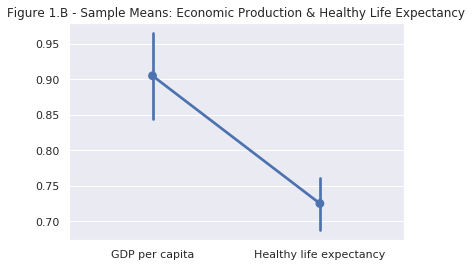

In [11]:
## Visually compare the sample means
pp = sns.pointplot(data=[var_1, var_2], join=True)
pp.set(xticklabels=['GDP per capita', 'Healthy life expectancy'])
s="Figure 1.B - Sample Means: Economic Production & Healthy Life Expectancy"
plt.title(s, {'fontsize': 12})
plt.show;

The sample population distributions displayed in **Figure 1.A** outline the spread of factor values. The density spread for each of the two factors show that most values exist between the $0.25$ and $1.5$.
>Recall that these values represent a factor's contribution in the evaluation of a country's happiness. The relatively large spike for the `healthy life expectancy` exists between the factor values $0.6$ and $0.8$, which illustrates how common that range is among countries.

On average, the contribution of a country's `economic productivity` is higher than that of having a `healthy life expectancy`; this is shown by the comparison of sample means in **Figure 1.B**.
>The average value for `GDP per capita` was calculated to be $0.905147$, while the average value for `Healthy life expectancy` was $0.725244$.

---

### 2. Is a country's perceived corruption related to the overall happiness of its citizens?

In [12]:
## Assign convenient names to variables
var_3 = df_2['Perceptions of corruption']
actual_happy_score = df_2['Actual Happiness Score']


## Calculate descriptive statistics for each variable
print(var_3.describe())
print('\n\n')
actual_happy_score.describe()

count    156.000000
mean       0.110603
std        0.094538
min        0.000000
25%        0.047000
50%        0.085500
75%        0.141250
max        0.453000
Name: Perceptions of corruption, dtype: float64





count    156.000000
mean       3.527224
std        0.980172
min        0.626000
25%        2.864500
50%        3.689000
75%        4.208250
max        5.456000
Name: Actual Happiness Score, dtype: float64

In [0]:
## Set default parameters & theme for displays
sns.set()

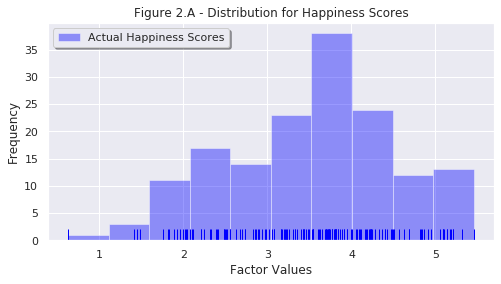

In [14]:
## Visualize the sample population distributions separately

# Actual Happiness Score
plt.figure(figsize=(8,4))
bins = 10
sns.distplot(actual_happy_score,
             kde=False,
             rug=True,
             label='Actual Happiness Scores',
             color='blue')
plt.legend(loc='upper left', shadow=True)
plt.xlabel('Factor Values')
plt.ylabel('Frequency')
s="Figure 2.A - Distribution for Happiness Scores"
plt.title(s, {'fontsize': 12})
plt.show;

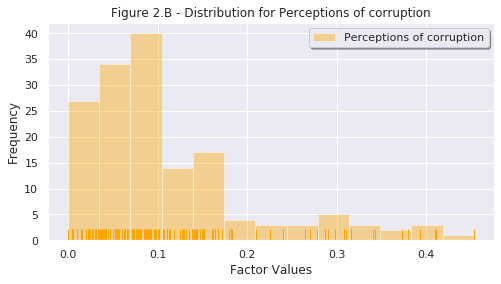

In [15]:
## Visualize the sample population distributions separately

# Perceptions of corruption
plt.figure(figsize=(8,4))
bins = 10
sns.distplot(var_3,
             kde=False,
             rug=True,
             label='Perceptions of corruption',
             color='orange')
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Factor Values')
plt.ylabel('Frequency')
s="Figure 2.B - Distribution for Perceptions of corruption"
plt.title(s, {'fontsize': 12})
plt.show;

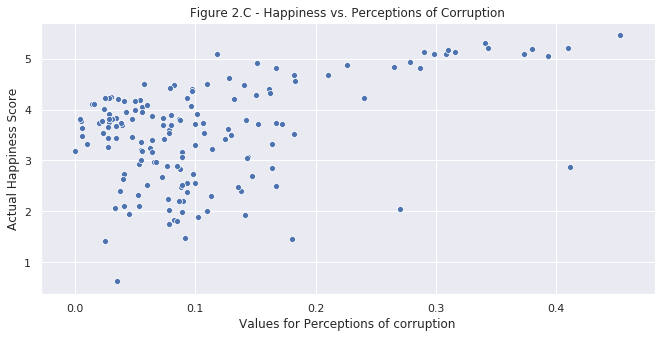

In [16]:
## Visually compare sample population data
plt.figure(figsize=(11,5))
sns.scatterplot(x='Perceptions of corruption',
                y='Actual Happiness Score',
                data=df_2)
plt.xlabel('Values for Perceptions of corruption')
plt.ylabel('Actual Happiness Score')
s="Figure 2.C - Happiness vs. Perceptions of Corruption"
plt.title(s)
plt.show;

The spread of the `actual overall happiness` data is shown in **Figure 2.A**; most values exist below $4.5$. Simultaneously, the sample population distribution displayed in **Figure 2.B** indicates that most of the surveyed countries didn't consider their respective `perceptions of corruption` to be a major contribution to the `overall happiness` of citizens. 
* The average value for the `actual happiness score` was calculated to be $3.527224$, while the average value for `perceptions of corruption` was $0.110603$.
>With additional inspection, the overall lack of data linearity in **Figure 2.C** also illustrates that `perceived corruption` wasn't significantly related to a country's `happiness score`. 


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


#### _Interesting Observations:_
* Most `perceived corruption` values that are less than $0.2$ were for countries with `happiness scores` below $4.0$.
* Considerable linearity exists after a `perceived corruption` value of $0.2$ (& arguably just after $0.1$) for `happiness scores` above $4.5$.
* Almost all `happiness scores` larger than $5.0$ had `perceived corruption` values greater than $0.25$.

>While `perceptions of corruption` hold the lowest average so far, the aforementioned observations outline an important note: 
```
Most of the highest-ranking countries evaluated `perceived corruption` as more of a contribution to
`overall happiness` than the extent to which lower ranking countries had evaluated.
```

---

### 3. Does having social support make people happier than having the freedom to make life choices?

  - Is there a significant difference between the two population means?
  - Is the social support value, on average, higher than that of having the freedom to make life choices?

In [17]:
var_4 = df_2['Social support']
var_5 = df_2['Freedom to make life choices']


## Calculate descriptive statistics for each variable
print(var_4.describe())
print('\n\n')
var_5.describe()

count    156.000000
mean       1.208814
std        0.299191
min        0.000000
25%        1.055750
50%        1.271500
75%        1.452500
max        1.624000
Name: Social support, dtype: float64





count    156.000000
mean       0.392571
std        0.143289
min        0.000000
25%        0.308000
50%        0.417000
75%        0.507250
max        0.631000
Name: Freedom to make life choices, dtype: float64

In [18]:
## Perform a t-test to formally compare the sample means
stats.ttest_ind(var_4, var_5)


## Provide the Confidence Interval (CI) along with the p-value to provide
#  both statistical (p) and substantive (CI) measures.

Ttest_indResult(statistic=30.73210125606325, pvalue=4.142244084525088e-96)

In [0]:
def get_95_ci(array_1, array_2):
  """
  Returns the calculated 95% Confidence Interval for the difference in
  means of the two input arrays.
  """
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_difference = sample_1_mean - sample_2_mean
  std_err_difference = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
  margin_of_error = 1.96 * std_err_difference
  ci_lower = mean_difference - margin_of_error
  ci_upper = mean_difference + margin_of_error
  return(f"The difference in means at the 95% Confidence Interval (two-tail) is between {ci_lower :.2f} and {ci_upper :.2f}.")

In [20]:
## Calculate the 95% Confidence Interval
print(get_95_ci(var_4, var_5))

The difference in means at the 95% Confidence Interval (two-tail) is between 0.76 and 0.87.


In [0]:
## Set default parameters & theme for displays
sns.set()

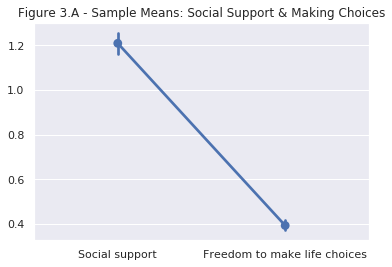

In [22]:
## Visually compare the sample means
pp = sns.pointplot(data=[var_4, var_5], join=True)
pp.set(xticklabels=['Social support', 'Freedom to make life choices'])
s="Figure 3.A - Sample Means: Social Support & Making Choices"
plt.title(s, {'fontsize': 12})
plt.show;

The independent `t-test` shows that there is a significant statistical difference between the two means, and calculated a considerably small `p-value` (on the order of $10^{-96}$). The conclusive evidence from this formal test, along with the respective averages, are illustrated by the point-comparison of sample means in **Figure 3.A**; the calculated average value for `social support` was $1.208814$, while the average for `freedom to make life choices` was $0.392571$. 


>These results can be interpreted as the following remarks:
- Even if the population means are identical (i.e., if the null hypothesis is true), there is a $<< 0.001$% chance of obtaining the observed statistical difference.
- With $95$% confidence, _the true difference in the population means_ is expected to exist between $0.76$ and $0.87$ based on the samples collected.
- On average, the contribution of having `social support` is higher than that of having `freedom to make life choices`.

---

#### Notes for Formulas

>**Assumptions for using the** `t-test`

1. The test variable is continuous.
2. There is no relationship between items; that is, the measurement of one observation does not affect the measurement of another.
3. Samples are drawn at random for each population.
4. The test variable’s samples and populations are approximately normally distributed.
5. Reasonably large enough samples were collected to be representative of the population.
6. Variances are approximately equal in both the sample and population.


---

>Formula used to perform the `t-test`

$$
t = \frac{\bar x_1 - \bar x_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$


<!-- Alternatively, use:
\begin{equation*}
\bar{x} ..
\end{equation*} -->

Where:
* $\bar x_1$ is the `mean` of the first sample set
* $\bar x_2$ is the `mean` of the second sample set
* $s_1$ is the `standard deviation` of the first sample set
* $s_2$ is the `standard deviation` of the second sample set
* $n_1$ is the `sample size` of the first sample set
* $n_2$ is the `sample size` of the second sample set


---

>**Result thresholds for the** `t-test`

* At the $95$% Confidence Interval (two-tail)
  * The critical value for the `test statistic` is $\mp 1.96$
  * The critical value for the `p-value` is $0.05$ or $5$%

  
  ---

>Formula used to calculate the $95$% Confidence Interval

$$
\bar x_1 - \bar x_2 \mp 1.96 * \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
$$


<!-- Alternatively, use:
\begin{equation*}
\bar{x} ..
\end{equation*} -->

Where:
* $\bar x_1$ is the `mean` of the first sample set
* $\bar x_2$ is the `mean` of the second sample set
* $s_1$ is the `standard deviation` of the first sample set
* $s_2$ is the `standard deviation` of the second sample set
* $n_1$ is the `sample size` of the first sample set
* $n_2$ is the `sample size` of the second sample set


---

# Results

## What happened with the Hypotheses?

#### 1. `Economic productivity` was, on average, more valuable to a country than having a `healthy life expectancy`; thus, the exploration of the given data yields the following conclusion:
>_Reject the first null hypothesis and accept the first alternative._

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### 2. Overall, `perceptions of corruption` wasn't considered to be a significant contribution to the `overall happiness`; thus, the exploration of the given data yields the following conclusion:
>_Fail to reject the second null hypothesis and reject the second alternative._

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

#### 3. `Social support` contributed to `overall happiness` more significantly than the `freedom to make life choices`; thus, the exploration of the given data yields the following conclusion:
>_Reject the third null hypothesis and accept the third alternative._


## Data Recap

In [23]:
## Summarize the sample population mean for each of the six factors
print("Sample population mean per factor, sorted from greatest to least:")
print()
df_2[factor_list].mean().sort_values(ascending=False)

Sample population mean per factor, sorted from greatest to least:



Social support                  1.208814
GDP per capita                  0.905147
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
dtype: float64

In [24]:
## Summarize the sample population mean for raw happiness scores 
# Display up to 6 decimal values to match output-format of other averages
print("Sample population mean for actual happiness scores:")
print(f"{actual_happy_score.mean() :.6f}")

Sample population mean for actual happiness scores:
3.527224


In [25]:
## Display Top 5 Ranks
df_top_5 = df_2[['Overall rank', 'Country or region']].head()
df_top_5.set_index('Overall rank', inplace=True)

print("Top 5 countries having the highest happiness scores:")
df_top_5

Top 5 countries having the highest happiness scores:


,Country or region
Overall rank,
1,Finland
2,Denmark
3,Norway
4,Iceland
5,Netherlands


In [26]:
## Display Bottom 5 Ranks
df_bottom_5 = df_2[['Overall rank', 'Country or region']].tail()
df_bottom_5.set_index('Overall rank', inplace=True)

print("Bottom 5 countries having the lowest happiness scores:")
df_bottom_5

Bottom 5 countries having the lowest happiness scores:


,Country or region
Overall rank,
152,Rwanda
153,Tanzania
154,Afghanistan
155,Central African Republic
156,South Sudan


# Discussion

#### Interested parties can use these research results to gain insight to _which countries are ranked as the happiest_, along with _which factors, on average, contribute most to a country’s happiness_.
* Out of the 156 surveyed countries or regions, **Finland** had the highest `happiness score` while **South Sudan** had the lowest for 2019.
* On average, `social support` contributed the most to a country's `overall happiness`; the average value for `GDP per capita` and `healthy life expectancy` were the second and third highest, respectively; and `perceptions of corruption` contributed the least with respect to the six factors evaluated.

> Although `perceived corruption` wasn't considered to be a significant factor overall, it's important to note that most of the highest-ranking countries considered it to be more of a contribution relative to the lower ranking countries.


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


#### Further research is needed to see how and why countries may fall or rise in the ranks over several years. The combined research results would enable interested parties to make research-driven decisions and track the progress of implementation.
>Knowing how high-ranking countries maintain happiness while achieving progress would help interested parties do, for example, the following:
* Identify new ways to improve social morale.
* Distinguish alternatives for healthier life-balances (exercise, diet, work-play, etc.).
  * Simultaneously, data from these actions would provide more insight to how `happier citizens` can improve `overall productivity` between various businesses locally and internationally.
* Explore innovative solutions to mitigate persisting challenges (emissions, energy sources, extreme weather and wildfires, healthcare, pollution, poverty, recycling, distribution of wealth, etc.).

---

## Other Considerations

### Insight into Observed Differences
* `Economic productivity over healthy life expectancy`
  * Based on modern-day circumstances, having sufficient `economic productivity` is one of the prerequisites for any country's progress and overall survival; especially if, for example, a country is either **A)** experiencing a difficult time (disasters, extreme weather, recession, etc.), **B)** trying to minimize conflict (internally or externally), or **C)** trying to improve the overall quality of life.

* `Social support over freedom to make life choices`
  * There are other variables that might explain the difference between these two factors.
    * For example, someone who is either **A)** struggling financially and has few options for progress, or **B)** satisfied with their job but not with their social life (work-play balance) might value having `social support` differently from having the `freedom to make life choices` based on their respective circumstances.
    * The `freedom to make life choices` factor values from some countries might be related to each country's **accessibility of opportunity**; that is, a country's ability to give all citizens equally unobstructed opportunity to freely make choices for improvement throughout life.

>Also,
* People who are susceptible to poor health, various societal constructs, and economic setbacks (discrimination, poverty, recession, etc.) might view each of the survey's factors differently than other citizens.
* How would happiness be evaluated based on how each country treats diseases, illnesses, and trauma? Similarly, how does each country affect (approach, exacerbate, mitigate, or view) the well-being of its depressed citizens?
* Developing a good metric for measuring how relatively depressed people are in each country could be a difficult task; however, by using other happiness indicators with other variables, clarity might take the form of several noticeable patterns.


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


### Other Variables
* Evaluating `overall happiness` by tracking other variables, such as the following, could help outline patterns between happier, healthier, and more successful countries:
  * Group 1 Variables: Data Overviews
    * _Employment rates_
    * _Famine rates_
    * _Homelessness rates_
    * _Medical outbreaks per unit of time_
    * _Poverty rates_
    * _Technological or scientific developments per unit of time_
    * _Treaties or disputes with other nations_

  * Group 2 Variables: Data from Individuals
    * _Satisfaction with occupation or financial status_
    * _Accessibility of "opportunities to make life choices for improvement"_
    * _Other health factors (like various types of depression or trauma)_


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


### Recommended Updates for Data Collection

According to [Kaggle](https://www.kaggle.com/unsdsn/world-happiness), `happiness scores and rankings use data from the Gallup World Poll.` However, the survey's implementation is unclear. For future data collection processes, tracking some or all of the following items could help avoid adverse effects in data analysis and interpretation:
* Diversity
  * _Who was surveyed; were they selected at random (activist, civil workers, doctors, educators, engineers, government officials, musicians, parents, politicians, researchers, students, etc.)?_
* Duration
  * _At which time of the year were surveys given and submitted / completed, respectively?_
* Quality
  * _How were the surveys distributed (via email, in person, phone, etc.)?_
* Quantity
  * _How many people were surveyed to represent the desired population?_ 

>These questions outline how the sample population may differ from the desired (actual) population, along with secondary metrics that could provide insight into the observed differences. Without knowing the answers to these questions, it's unclear how one could test for either _observer bias_ and _sampling / selection bias_.

---


## Next Steps for Further Research

1. Test the same hypotheses for data from other years (2015, 2016, etc.).
2. Calculate and examine correlations between various factors.

>For the highest-ranking and lowest-ranking countries, respectively:
3. Determine how factor values changed over time.
4. Outline the trend or oscillations of a country's overall rank.
5. Research various aspects of how daily-life differs (perhaps using the variables and secondary metrics mentioned earlier).
6. Based on those research results, discuss how effective each country is at improving its overall happiness; perhaps relate it to interesting patterns observed (like with healthcare, technological developments, work-life balance, etc.).
